In [ ]:
# Mounting the google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Malaria Detection VGG19

### WE WILL BE CLASSIFYING WHETHER THERSON HAS MALARIA OR NOT BY CLASSIFYING THE X-RAY SCANS

### OF INFECTED AND UNINFECTED IMAGES.

#### WE WILL CLASSIFY IMAGES USING TRANSFER LEARNING TECHNIQUE(VGG 19)
Transfer Learning: Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge

gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while

learning to recognize cars could apply when trying to recognize trucks.

# <b>1.0 <span style='color:red'>|</span> Import Packages </b> <a class="anchor" id="1.0"></a>

In [ ]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense,Lambda,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
# RE-SIZE ALL THE IMAGES TO THIS
IMAGE_SIZE = [224,224]
train=r'/content/drive/MyDrive/Train'
valid_path= r'/content/drive/MyDrive/Test'

In [ ]:
# IMPORTING THE VGG 19 LIBRARY AS SHOWN AND ADDING PRE PROCESSING LAYER TO THE FRONT OF VGG
# WE WILL USE IMAGENET WEIGHTS

vgg19= VGG19(input_shape= IMAGE_SIZE + [3], weights='imagenet',include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes, here we have 2 i.e Parasite and uninfected
folders= glob(r'/content/drive/MyDrive/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Train/Uninfected',
 '/content/drive/MyDrive/Train/Parasite']

In [ ]:
# OUR LAYERS- YOU CAN ADD MORE IF YOU WANT
# FLATTENING THE LAST LAYER OF VGG19
x= Flatten()(vgg19.output)

In [ ]:
# we will be having 2 nodes in our output layer because we have 2 classes to classify
prediction= Dense(len(folders),activation='softmax')(x)

# creating a model
model= Model(inputs=vgg19.input,outputs=prediction)

In [ ]:
# viewing the structure of model
# in last layer we can see that we have  2 nodes
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# TELLING THE MODEL WHAT COST AND OPTIMIZATION METHOD TO USE
# we are using adam optimizer
# we are using categorical_cross entropy because we have 2 nodes in last layer
model.compile(
           loss='categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy']
)

In [ ]:
# USING THE IMAGE DATA GENERATOR TO IMPORT IMAGES FROM DATASET
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

# WE DONT USE IMAGE AUGMENTATION ON TEST DATA EXCEPT RESCALING
test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
# MAKE SURE YOU PROVIDE THE SAME TARGET SIZE AS INITIALIZED FOR THE IMAGE SIZE
training_set= train_datagen.flow_from_directory(r'/content/drive/MyDrive/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 416 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
13/13 [==============================] - 380s 29s/step - loss: 1.1991 - accuracy: 0.5433 - val_loss: 0.5017 - val_accuracy: 0.7313
Epoch 2/50
13/13 [==============================] - 354s 28s/step - loss: 0.5003 - accuracy: 0.7620 - val_loss: 0.4781 - val_accuracy: 0.7612
Epoch 3/50
13/13 [==============================] - 352s 28s/step - loss: 0.4128 - accuracy: 0.7957 - val_loss: 0.4369 - val_accuracy: 0.7910
Epoch 4/50
13/13 [==============================] - 355s 28s/step - loss: 0.3453 - accuracy: 0.8630 - val_loss: 0.4211 - val_accuracy: 0.8134
Epoch 5/50
13/13 [==============================] - 357s 28s/step - loss: 0.3726 - accuracy: 0.8365 - val_loss: 0.4042 - val_accuracy: 0.7836
Epoch 6/50
13/13 [==============================] - 353s 28s/step - loss: 0.3022 - accuracy: 0.8846 - val_loss: 0.4269 - val_accuracy: 0.7985
Epoch 7/50
13/13 [==============================] - 351s 28s/step - loss: 0.2797 - accuracy: 0.8990 - val_loss: 0.3745 - val_accuracy: 0.8507
Epoch 

### WE CAN SEE THAT WE ARE GETTING AN ACCURACY OF 97.60% IN OUR FINAL EPOCH WHICH IS PRETTY GOOD

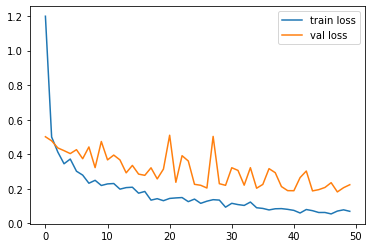

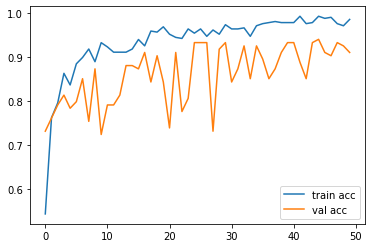

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
 # save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
# our prediction variable
y_pred = model.predict(test_set)

In [ ]:
y_pred# LOADING THE MODEL
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg19.h5')

In [ ]:
# PATH OF AN IMAGE FROM OUR TEST DATASET
img= image.load_img(r'/content/drive/MyDrive/Test/Uninfected/2.png',target_size=(224,224))

In [ ]:
# CONVERTING THE IMAGE INTO ARRAY
y=image.img_to_array(img)
y

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
# LOOKING AT THE SHAPE OF THE IMAGE---> 3D
y.shape

(224, 224, 3)

In [ ]:
y=y/255

In [ ]:
# EXPANDING THE DIMENSIONS

y=np.expand_dims(y,axis=0)
img_data=preprocess_input(y)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[6.0380253e-06, 9.9999392e-01]], dtype=float32)

In [ ]:
a= np.argmax(model.predict(img_data),axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


OUR PREDICTION IS CORRECT HERE